 EDA Phase 1 (Raw Data Analysis)

✅ Đã đọc file thành công!
✅ Đã lưu ảnh: platform_distribution.png


/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_514/831466451.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='platform', data=df, palette='Set2', order=df['platform'].value_counts().index)


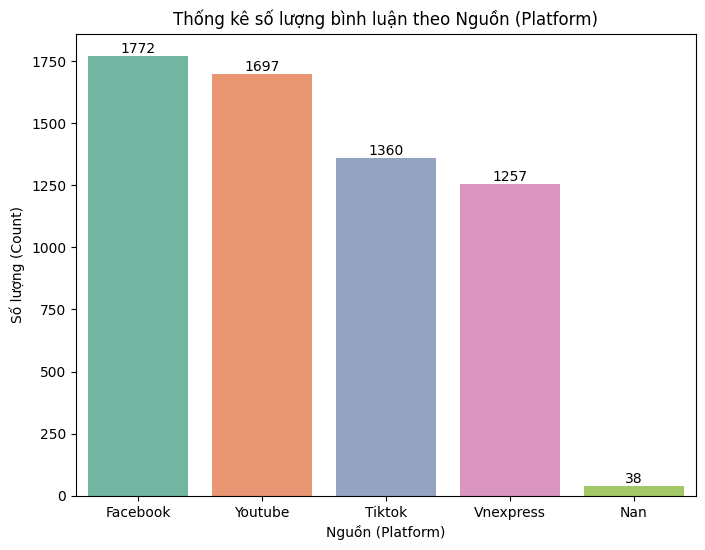

✅ Đã lưu ảnh: label_distribution.png


/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_514/831466451.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label_id', data=df, palette='viridis')


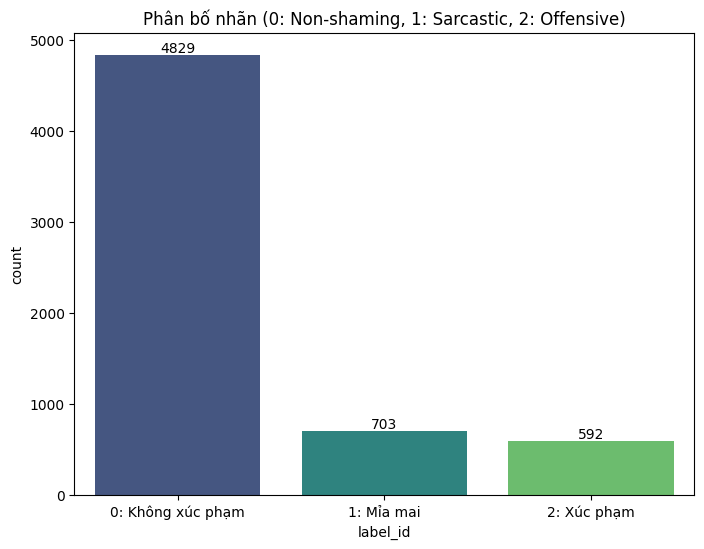

✅ Đã lưu ảnh: sentence_length.png


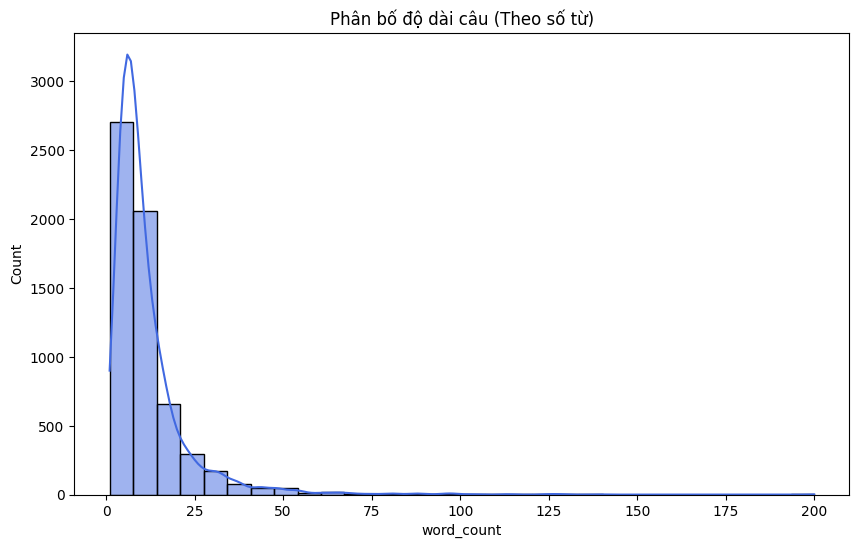


--- SỐ LIỆU BÁO CÁO ---
Tổng số dòng dữ liệu: 6124

Thống kê theo Platform:
platform
Facebook     1772
Youtube      1697
Tiktok       1360
Vnexpress    1257
Nan            38
Name: count, dtype: int64

Tỷ lệ phân bố nhãn (%):
label_id
0    78.853690
1    11.479425
2     9.666884
Name: proportion, dtype: float64

Thống kê độ dài câu:
- Trung bình: 11.55 từ
- Ngắn nhất: 1 từ
- Dài nhất: 200 từ


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- CẤU HÌNH ---
FILE_PATH = os.path.join('..', 'data', 'raw', 'dataset_raw.csv')

try:
    # 1. Đọc dữ liệu
    if FILE_PATH.endswith('.xlsx'):
        df = pd.read_excel(FILE_PATH)
    else:
        df = pd.read_csv(FILE_PATH, encoding='utf-8-sig')

    print("✅ Đã đọc file thành công!")

    # 2. Xử lý sơ bộ
    df = df.dropna(subset=['label', 'comment_text'])

    # 3. MAPPING NHÃN
    df['label'] = df['label'].astype(str).str.strip()
    label_mapping = {
        'Không xúc phạm': 0,
        'Mỉa mai': 1,
        'Xúc phạm': 2
    }
    df['label_id'] = df['label'].map(label_mapping)
    
    # Xử lý nhãn lỗi
    df['label_id'] = df['label_id'].fillna(-1)


    # --- THỐNG KÊ NGUỒN DỮ LIỆU (PLATFORM) ---
    
    # Kiểm tra xem cột 'platform' có tồn tại không
    if 'platform' in df.columns:
        # Chuẩn hóa tên platform (viết hoa chữ cái đầu, xóa khoảng trắng) để tránh bị trùng (vd: tiktok vs TikTok)
        df['platform'] = df['platform'].astype(str).str.strip().str.title()
        
        # Vẽ biểu đồ
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x='platform', data=df, palette='Set2', order=df['platform'].value_counts().index)
        
        plt.title('Thống kê số lượng bình luận theo Nguồn (Platform)')
        plt.xlabel('Nguồn (Platform)')
        plt.ylabel('Số lượng (Count)')
        
        # Hiển thị số liệu trên cột
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom')
        
        plt.savefig('platform_distribution.png')
        print("✅ Đã lưu ảnh: platform_distribution.png")
        plt.show()
    else:
        print("⚠️ Không tìm thấy cột 'platform' trong dữ liệu.")


    # --- VẼ BIỂU ĐỒ 1: PHÂN BỐ NHÃN ---
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='label_id', data=df, palette='viridis')
    plt.title('Phân bố nhãn (0: Non-shaming, 1: Sarcastic, 2: Offensive)')
    plt.xticks([0, 1, 2], ['0: Không xúc phạm', '1: Mỉa mai', '2: Xúc phạm'])
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    plt.savefig('label_distribution.png')
    print("✅ Đã lưu ảnh: label_distribution.png")
    plt.show()

    # --- VẼ BIỂU ĐỒ 2: ĐỘ DÀI CÂU ---
    df['word_count'] = df['comment_text'].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(10, 6))
    sns.histplot(df['word_count'], bins=30, kde=True, color='royalblue')
    plt.title('Phân bố độ dài câu (Theo số từ)')
    
    plt.savefig('sentence_length.png')
    print("✅ Đã lưu ảnh: sentence_length.png")
    plt.show()

    # --- IN THỐNG KÊ BÁO CÁO ---
    print("\n--- SỐ LIỆU BÁO CÁO ---")
    print(f"Tổng số dòng dữ liệu: {len(df)}")
    
    if 'platform' in df.columns:
        print("\nThống kê theo Platform:")
        print(df['platform'].value_counts())
        
    print("\nTỷ lệ phân bố nhãn (%):")
    print(df['label_id'].value_counts(normalize=True).sort_index() * 100)
    print("\nThống kê độ dài câu:")
    print(f"- Trung bình: {df['word_count'].mean():.2f} từ")
    print(f"- Ngắn nhất: {df['word_count'].min()} từ")
    print(f"- Dài nhất: {df['word_count'].max()} từ")

except FileNotFoundError:
    print("❌ Lỗi: Không tìm thấy file. Hãy kiểm tra lại đường dẫn.")
except Exception as e:
    print(f"❌ Lỗi: {e}")

EDA Phase 2 (Content Analysis)

Đang đọc file: ../data/processed/train_stat.csv...

--- PHẦN 1: THỐNG KÊ TỔNG QUAN ---


/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_31873/473650072.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label_name', data=df, palette='viridis',


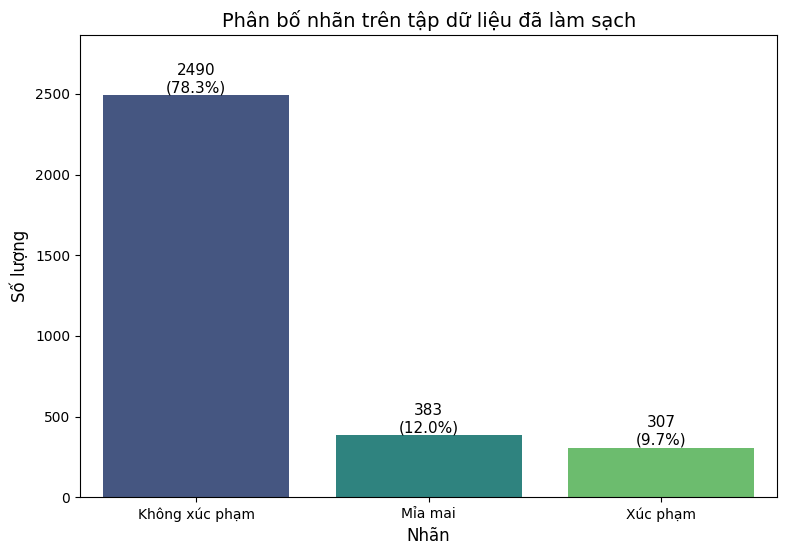

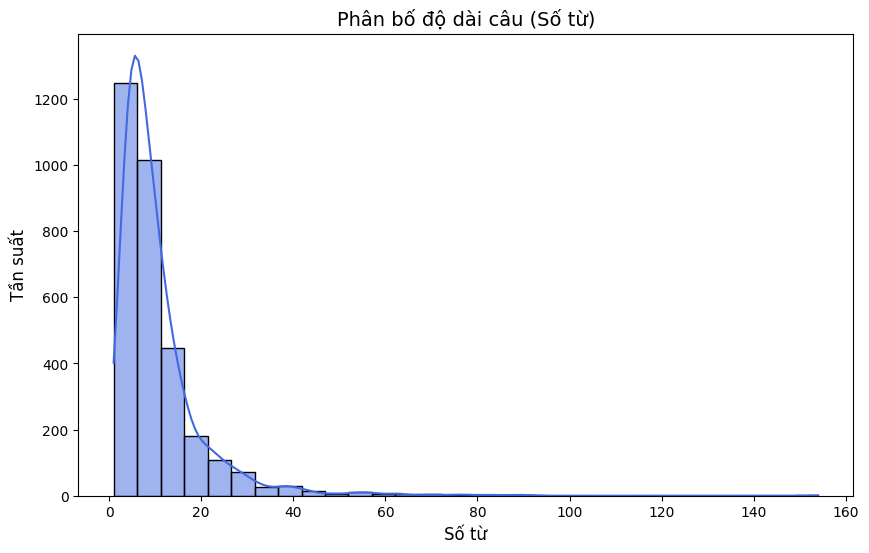

- Độ dài trung bình: 10.60 từ
- Câu dài nhất: 154 từ
- Câu ngắn nhất: 1 từ

--- PHẦN 2: ĐẶC ĐIỂM NGÔN NGỮ TỪNG NHÃN ---

>>> Đang phân tích nhãn: KHÔNG XÚC PHẠM...


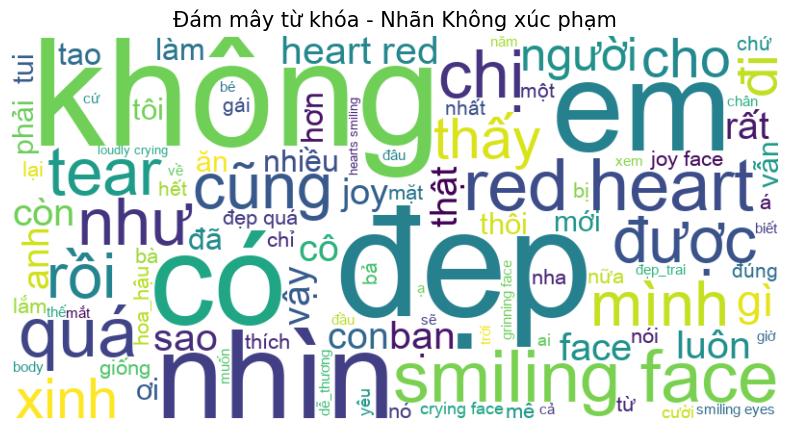

/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_31873/473650072.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='So_luong', y='Cum_tu', data=df_ngram, palette='viridis')


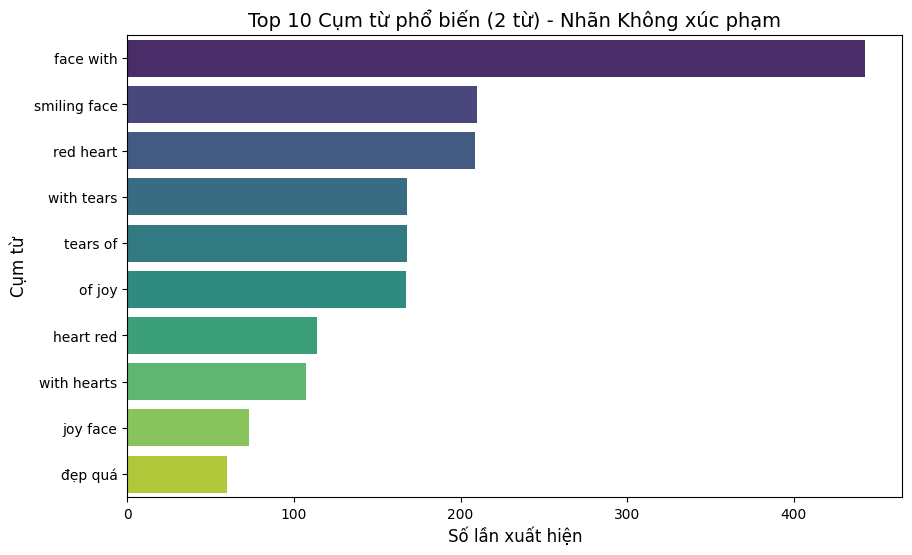


>>> Đang phân tích nhãn: MỈA MAI...


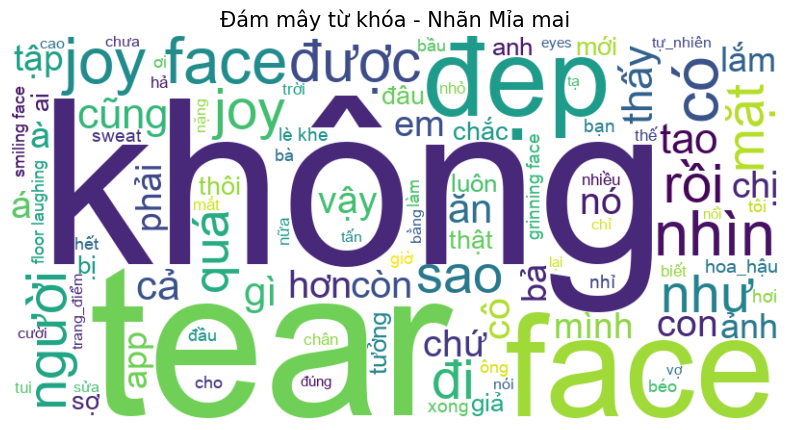

/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_31873/473650072.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='So_luong', y='Cum_tu', data=df_ngram, palette='viridis')


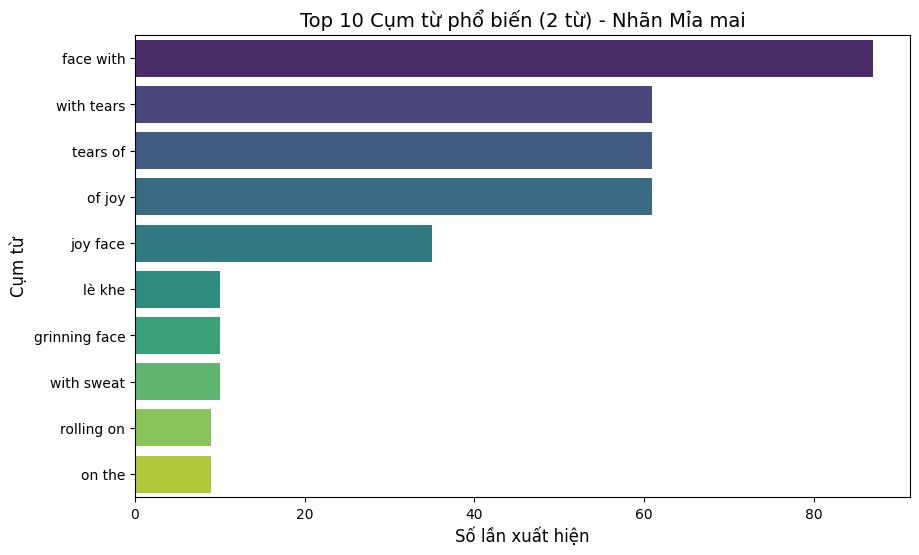


>>> Đang phân tích nhãn: XÚC PHẠM...


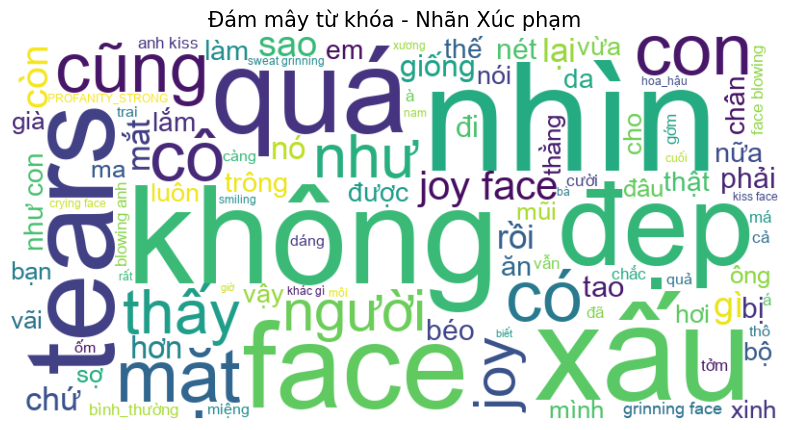

/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_31873/473650072.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='So_luong', y='Cum_tu', data=df_ngram, palette='viridis')


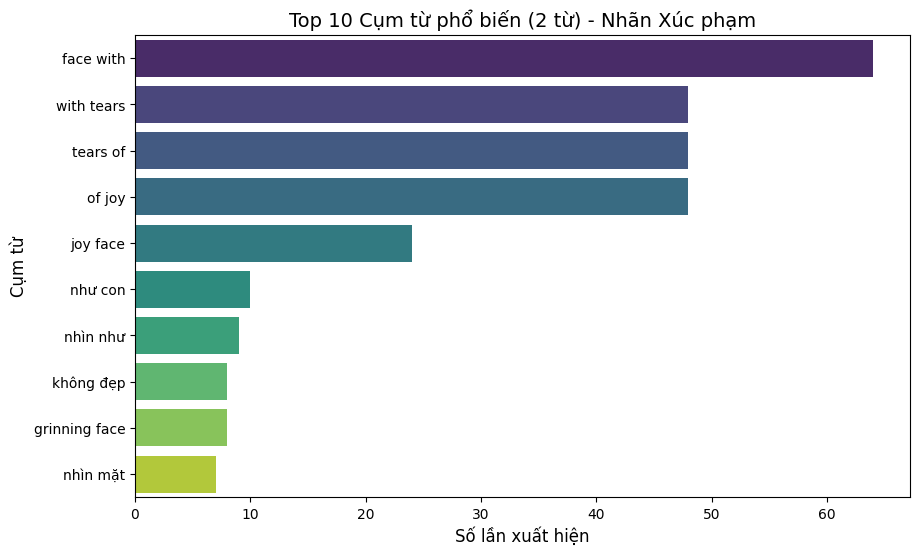

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import os

# --- 1. CẤU HÌNH ---
# Đường dẫn file đã xử lý (train_stat.csv)
INPUT_FILE = os.path.join('..', 'data', 'processed', 'train_stat.csv')

# Đường dẫn Font chữ (Sửa lại cho đúng máy bạn)
# Windows: 'C:/Windows/Fonts/arial.ttf' | Mac: '/Library/Fonts/Arial Unicode.ttf'
FONT_PATH = '/Library/Fonts/Arial Unicode.ttf' 

# --- HÀM TỰ ĐỘNG TÌM CỘT TEXT ---
def find_text_column(df):
    possible_names = ['text', 'comment_text', 'content', 'cmt_text']
    for name in possible_names:
        if name in df.columns: return name
    return None

try:
    print(f"Đang đọc file: {INPUT_FILE}...")
    df = pd.read_csv(INPUT_FILE, encoding='utf-8-sig')
    
    # Tìm cột chứa văn bản
    text_col = find_text_column(df)
    if not text_col: raise ValueError("Không tìm thấy cột văn bản.")
    
    # Chuyển đổi dữ liệu để vẽ
    df[text_col] = df[text_col].astype(str)
    
    # Tạo cột tên nhãn tiếng Việt cho đẹp
    label_map = {0: 'Không xúc phạm', 1: 'Mỉa mai', 2: 'Xúc phạm'}
    if 'label' in df.columns:
        df['label_name'] = df['label'].map(label_map)

    # ==============================================================================
    # PHẦN 1: THỐNG KÊ TỔNG QUAN 
    # ==============================================================================
    print("\n--- PHẦN 1: THỐNG KÊ TỔNG QUAN ---")

    # --- 1.1 Biểu đồ Phân bố nhãn (CÓ HIỂN THỊ %) ---
    plt.figure(figsize=(9, 6))
    ax = sns.countplot(x='label_name', data=df, palette='viridis', 
                       order=['Không xúc phạm', 'Mỉa mai', 'Xúc phạm'])
    plt.title('Phân bố nhãn trên tập dữ liệu đã làm sạch', fontsize=14)
    plt.xlabel('Nhãn', fontsize=12)
    plt.ylabel('Số lượng', fontsize=12)
    
    # Hiển thị số liệu và phần trăm
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        # Format: Số lượng (xuống dòng) (Phần trăm%)
        ax.annotate(f'{int(height)}\n({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=11, color='black')
        
    plt.ylim(0, df['label_name'].value_counts().max() * 1.15) # Nới rộng trục Y
    plt.show()

    # --- 1.2 Thống kê Độ dài câu ---
    # Tính số từ
    df['so_tu'] = df[text_col].apply(lambda x: len(x.split()))
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['so_tu'], bins=30, kde=True, color='royalblue')
    plt.title('Phân bố độ dài câu (Số từ)', fontsize=14)
    plt.xlabel('Số từ', fontsize=12)
    plt.ylabel('Tần suất', fontsize=12)
    plt.show()

    # In con số cụ thể để ghi vào báo cáo
    print(f"- Độ dài trung bình: {df['so_tu'].mean():.2f} từ")
    print(f"- Câu dài nhất: {df['so_tu'].max()} từ")
    print(f"- Câu ngắn nhất: {df['so_tu'].min()} từ")

    # ==============================================================================
    # PHẦN 2: PHÂN TÍCH NGÔN NGỮ (WORDCLOUD & TOP N-GRAMS)
    # ==============================================================================
    print("\n--- PHẦN 2: ĐẶC ĐIỂM NGÔN NGỮ TỪNG NHÃN ---")

    # Hàm vẽ WordCloud
    def plot_wordcloud(text_data, title):
        try:
            wc = WordCloud(
                background_color='white',
                width=800, height=400,
                font_path=FONT_PATH,
                max_words=100,
                colormap='viridis'
            ).generate(str(text_data))
            plt.figure(figsize=(10, 5))
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.title(title, fontsize=15)
            plt.show()
        except Exception as e:
            print(f"Lỗi vẽ WordCloud: {e}")

    # Hàm vẽ Top N-grams
    def plot_top_ngrams(corpus, title, n=2, top_k=10):
        try:
            corpus = corpus.dropna().astype(str)
            if len(corpus) == 0: return

            vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0) 
            words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            
            df_ngram = pd.DataFrame(words_freq[:top_k], columns=['Cum_tu', 'So_luong'])
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x='So_luong', y='Cum_tu', data=df_ngram, palette='viridis')
            plt.title(title, fontsize=14)
            plt.xlabel('Số lần xuất hiện', fontsize=12)
            plt.ylabel('Cụm từ', fontsize=12)
            plt.show()
        except ValueError:
            print(f"Không đủ dữ liệu để vẽ biểu đồ cho: {title}")

    # Vòng lặp vẽ cho 3 nhãn (0, 1, 2)
    for label_code, label_name in label_map.items():
        subset = df[df['label'] == label_code]
        
        if len(subset) > 0:
            print(f"\n>>> Đang phân tích nhãn: {label_name.upper()}...")
            text_corpus = subset[text_col]
            
            # 1. Vẽ WordCloud
            plot_wordcloud(text_corpus.str.cat(sep=' '), f"Đám mây từ khóa - Nhãn {label_name}")
            
            # 2. Vẽ Top 10 Bigrams (Cụm 2 từ)
            plot_top_ngrams(text_corpus, f"Top 10 Cụm từ phổ biến (2 từ) - Nhãn {label_name}", n=2)
            
        else:
            print(f"Không có dữ liệu cho nhãn {label_name}")

except Exception as e:
    print(f"Lỗi: {e}")